In [1]:
import os

import pandas as pd
import numpy as np
from glob import  glob

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
input_dir = '/src/atmacup/atmacup11/data/inputs/'
photo_dir = os.path.join(input_dir, 'photos')
photo_pathes = glob(os.path.join(photo_dir, "*.jpg"))
output_dir = '/src/atmacup/atmacup11/data/outputs/'

os.makedirs(output_dir, exist_ok=True)

train_df = pd.read_csv(os.path.join(input_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(input_dir, 'test.csv'))

In [7]:
train_df = pd.read_csv(os.path.join(input_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(input_dir, 'test.csv'))
material_df = pd.read_csv(os.path.join(input_dir, 'materials.csv'))
technique_df = pd.read_csv(os.path.join(input_dir, 'techniques.csv'))

In [8]:
from matplotlib_venn import venn2

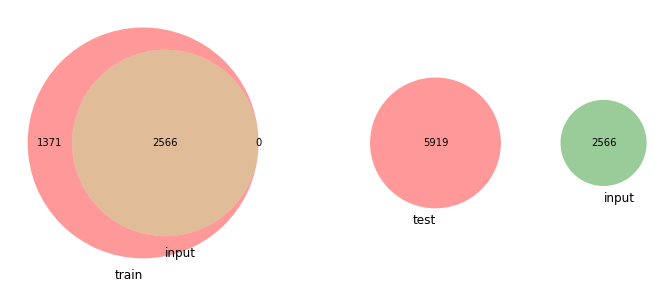

In [16]:
input_df = technique_df

fig, axes = plt.subplots(figsize=(12, 5), ncols=2)

venn2(subsets=(
    set(train_df['object_id']), set(input_df['object_id'])
), set_labels=('train', 'input'), ax=axes[0])

venn2(subsets=(
    set(test_df['object_id']), set(input_df['object_id'])
), set_labels=('test', 'input'), ax=axes[1])

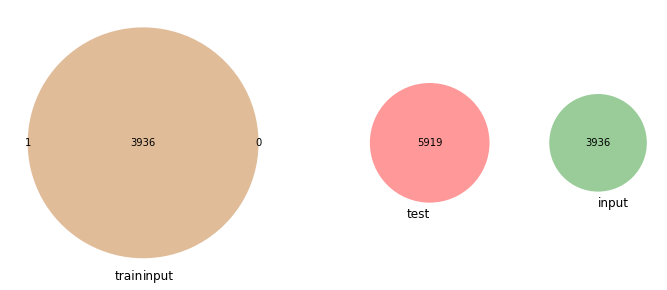

In [20]:
input_df = material_df

fig, axes = plt.subplots(figsize=(12, 5), ncols=2)
                         
venn2(subsets=(
    set(train_df['object_id']), set(input_df['object_id'])
), set_labels=('train', 'input'), ax=axes[0])

venn2(subsets=(
    set(test_df['object_id']), set(input_df['object_id'])
), set_labels=('test', 'input'), ax=axes[1])


In [21]:
train_df.head()

,object_id,sorting_date,art_series_id,target
0,002bff09b09998d0be65,1631,509357f67692a6a45626,1
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3
3,004890880e8e7431147b,1743,582ac2d7f0cef195b605,2
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3


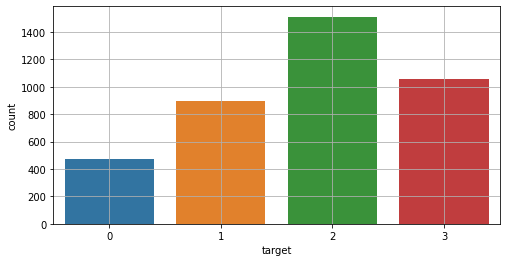

In [22]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=train_df, x='target', ax=ax)
ax.grid()

In [23]:
train_df['target'].value_counts().sort_index()

0     475
1     896
2    1511
3    1055
Name: target, dtype: int64

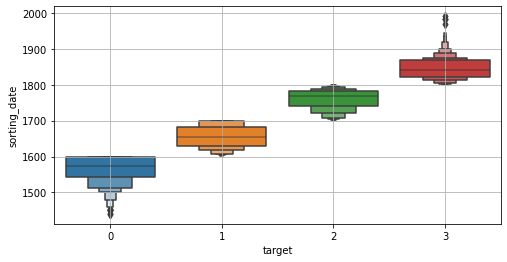

In [24]:
fig, ax = plt.subplots(figsize=(8,4))
sns.boxenplot(data=train_df, x='target', y='sorting_date', ax=ax)
ax.grid()

In [25]:
train_df.groupby('target')['sorting_date'].agg(['min', 'max', 'median', 'size'])

,min,max,median,size
target,,,,
0,1440,1600,1574,475
1,1601,1700,1655,896
2,1701,1800,1770,1511
3,1801,1991,1841,1055


In [27]:
test_df.head()

,object_id
0,0009e50b94be36ccad39
1,000bd5e82eb22f199f44
2,0015f44de1854f617516
3,00388a678879ba1efa27
4,005e1e7c6496902d23f3


In [29]:
from PIL import Image

In [30]:
def to_img_path(object_id):
    return os.path.join(photo_dir, f'{object_id}.jpg')

def read_image(object_id):
    return Image.open(to_img_path(object_id))

In [31]:
img = read_image(train_df['object_id'].iat[0])

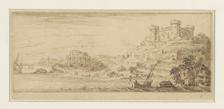

In [32]:
img

In [33]:
from torchvision import transforms as T

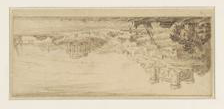

In [35]:
T.RandomVerticalFlip(p=1)(img)

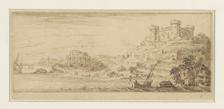

In [38]:
T.RandomVerticalFlip(p=0.001)(img)

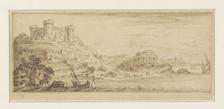

In [39]:
T.RandomHorizontalFlip(p=1)(img)

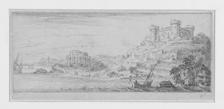

In [40]:
T.RandomGrayscale(1)(img)

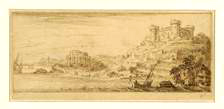

In [67]:
T.ColorJitter(brightness=.3, contrast=.5, saturation=[.8, 1.3])(img)

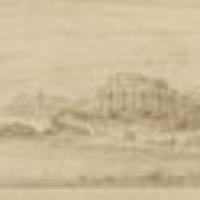

In [77]:
T.RandomResizedCrop(size=(200,200),)(img)

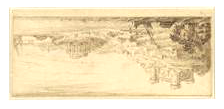

In [92]:
converter = T.Compose([
    T.RandomVerticalFlip(p=1),
    T.ColorJitter(brightness=.5, contrast=.5)
])

converter(img)

In [93]:
import torch
from torchvision.models import resnet34
from torch import nn

In [115]:
model = resnet34(pretrained=False)

In [116]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [98]:
converter = T.Compose([
    T.RandomVerticalFlip(p=1),
    T.ColorJitter(brightness=.5, contrast=.5),
    T.ToTensor()
])

In [99]:
x = converter(img)

In [100]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [101]:
type(x)

torch.Tensor

In [103]:
x.shape

torch.Size([3, 109, 224])

In [106]:
# pytorchはまとめて処理することを想定しているから、unsqueezeで1足す必要がある
# もしなかったら、モデルは「３枚の画像、１０９チャンネル、２２４の高さって想定と違う認識をしてしまう
x.unsqueeze(0).shape

torch.Size([1, 3, 109, 224])

In [107]:
output = model(x.unsqueeze(0))

In [108]:
output

tensor([[ 2.4516e-01, -3.8884e-01,  1.5455e+00,  2.6253e-01, -3.0300e-01,
         -1.3023e-01,  4.5160e-01, -6.6075e-01, -3.7991e-01,  7.5880e-01,
          9.0351e-02, -4.5845e-01, -5.6151e-01, -3.2099e-02, -8.0451e-01,
         -4.2700e-01,  1.9247e-01,  4.7326e-01, -2.6359e-01,  5.2513e-02,
          7.8006e-01, -2.9748e-01, -1.3421e+00, -9.1210e-01,  8.0222e-01,
         -9.3356e-01,  1.0516e+00, -9.3952e-04, -1.7453e-01,  1.3479e-01,
          5.2825e-01, -3.1971e-01, -3.9620e-01, -3.2000e-01, -1.3955e-01,
         -3.1644e-01, -2.3958e-01, -2.0428e-01,  2.8835e-01, -1.1182e+00,
          5.0502e-02,  1.4053e-01,  2.0427e-01,  1.2720e-01,  7.5072e-01,
         -6.8315e-01,  9.5287e-01, -1.7901e+00, -6.4286e-01, -4.4567e-01,
         -1.0399e+00, -6.0662e-01,  8.7809e-01, -6.5040e-01,  2.1454e-01,
          5.4655e-02, -1.8625e-01, -4.5420e-01,  2.9552e-01,  6.0330e-02,
         -7.3624e-01, -3.2476e-01,  1.2547e+00, -4.7711e-01,  5.4922e-01,
          9.5913e-04,  5.0927e-01,  2.

In [109]:
output.shape

torch.Size([1, 1000])

In [117]:
model.fc = nn.Linear(in_features=512, out_features=1, bias=True)

In [118]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [113]:
model(x.unsqueeze(0))

tensor([[0.5787]], grad_fn=<AddmmBackward>)

In [119]:
criterion = nn.MSELoss()

In [121]:
(3 - 10) ** 2

49

In [122]:
criterion(torch.Tensor([3]), torch.Tensor([10]))

tensor(49.)

In [123]:
from torch.optim import Adam

optimizer = Adam(params=model.parameters(), lr=1e-3)

In [147]:
x = converter(img)
x = x.unsqueeze(0)

label = train_df['target'].iat[0]
label = torch.Tensor([label])
label = label.reshape(-1, 1)

output = model(x)
loss = criterion(output, label)

optimizer.zero_grad()

loss.backward()

optimizer.step()

print(loss.item())

0.00161151890642941


In [129]:
label

tensor([[1.]])

In [127]:
train_df['target'].iat[0]

1